# Reproducing the results of Miguel et al. (2004)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load tab-delimited data from the original paper by Miguel et al. (2004)

The data is uploaded along with the paper as replication data and can be found [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/27324). We load this dataset to first compare the relevant variables with the dataset we constructed (which has more up-to-date data, as it's more than 20 years later than the original paper).

The relevant column names are:
- `GPCP_g`: rainfall variation
- `GCPC_g_l`: rainfall variation with a lag of one year
- `year`: year
- `country_code`: ISO3 code of the country
- `gdp_g`: GDP growth

In [3]:
data = pd.read_csv('mss_repdata.tab', delimiter='\t')
data.head(15)

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540,1981,Angola,AGO,839.21576,911.84730,1021.77686,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
1,540,1982,Angola,AGO,969.86456,839.21576,911.84730,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
2,540,1983,Angola,AGO,936.42163,969.86456,839.21576,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
3,540,1984,Angola,AGO,992.53625,936.42163,969.86456,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
4,540,1985,Angola,AGO,974.39610,992.53625,936.42163,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
5,540,1986,Angola,AGO,1184.88430,974.39610,992.53625,0.216019,-0.018277,-0.103502,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
6,540,1987,Angola,AGO,1062.24680,1184.88430,974.39610,-0.103502,0.216019,0.147912,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
7,540,1988,Angola,AGO,1219.36600,1062.24680,1184.88430,0.147912,-0.103502,-0.116582,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
8,540,1989,Angola,AGO,1077.21010,1219.36600,1062.24680,-0.116582,0.147912,0.052566,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0
9,540,1990,Angola,AGO,1133.83480,1077.21010,1219.36600,0.052566,-0.116582,-0.200939,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.50,0.500712,1.0


List of column names

In [4]:
print(data.columns.to_list())

['ccode', 'year', 'country_name', 'country_code', 'GPCP', 'GPCP_l', 'GPCP_l2', 'GPCP_g', 'GPCP_g_l', 'GPCP_g_fl', 'GPCP_d', 'GPCP_d_l', 'GPCP_df_mean', 'GPCP_df_mean_l', 'GPCP_df_mean_l2', 'NCEP', 'NCEP_l', 'NCEP_l2', 'NCEP_g', 'NCEP_g_l', 'NCEP_g_fl', 'NCEP_d', 'NCEP_d_l', 'NCEP_df_mean', 'NCEP_df_mean_l', 'NCEP_df_mean_l2', 'sm_obs', 'FAO', 'FAO_l', 'FAO_l2', 'FAO_g', 'FAO_g_l', 'FAO_g_fl', 'FAO_d', 'FAO_d_l', 'FAO_df_mean', 'FAO_df_mean_l', 'FAO_df_mean_l2', 'NDVI', 'NDVI_l', 'NDVI_l2', 'NDVI_g', 'NDVI_g_l', 'NDVI_g_fl', 'NDVI_d', 'NDVI_d_l', 'NDVI_df_mean', 'NDVI_df_mean_l', 'NDVI_df_mean_l2', 'type3', 'type4', 'war_prio', 'minor_prio', 'any_prio', 'war_prio_on', 'minor_prio_on', 'any_prio_on', 'war_prio_off', 'minor_prio_off', 'any_prio_off', 'wars', 'war', 'warl', 'onset', 'ended', 'waryrs', 'pop', 'lpop', 'polity2', 'gdpen', 'gdpenl', 'lgdpenl1', 'lpopl1', 'colbrit', 'colfra', 'mtnest', 'lmtnest', 'Oil', 'ncontig', 'ethfrac', 'ef', 'relfrac', 'nwstate', 'polity2l', 'instab', 'de

Load our dataset for comparison

In [5]:
our_data = pd.read_csv('../../02_dataset/merged_df.csv')

Rename our data so that the column names will match the paper's dataset

In [6]:
codes = data['country_code'].unique()
our_data.rename(columns={'country':'country_name', 'ISO3_code': 'country_code', 'Year':'year', 'gdp_g':'gdp_g_ours'}, inplace=True)
our_data = our_data[our_data['country_code'].isin(codes)]
our_data.head(15)

,Unnamed: 0,country_code,year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country_name,ethnic_fractionation_index,mean_temp,...,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,number_events,yprotest,protest_fraction
192,192,AGO,1960,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.6,...,NaN,14.62,NaN,0.486414,NaN,NaN,NaN,NaN,NaN,NaN
193,193,AGO,1961,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.3,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN
194,194,AGO,1962,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.3,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN
195,195,AGO,1963,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.3,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN
196,196,AGO,1964,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.3,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN
197,197,AGO,1965,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.3,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN
198,198,AGO,1966,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.5,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN
199,199,AGO,1967,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.3,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN
200,200,AGO,1968,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.4,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN
201,201,AGO,1969,14.902152,4.094633,-4.318182,2.000414e+10,Angola,0.779,21.6,...,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN,NaN,NaN


# Comparison of data for relevant variables

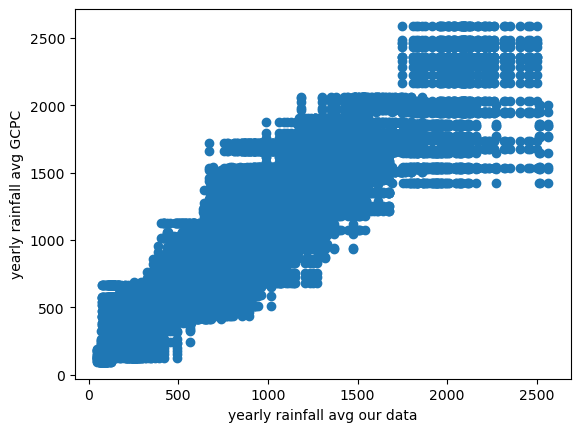

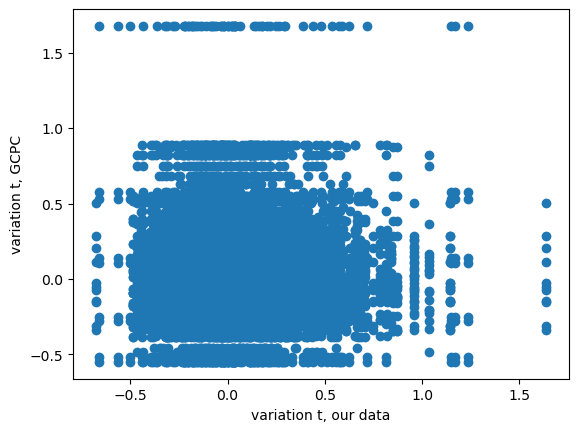

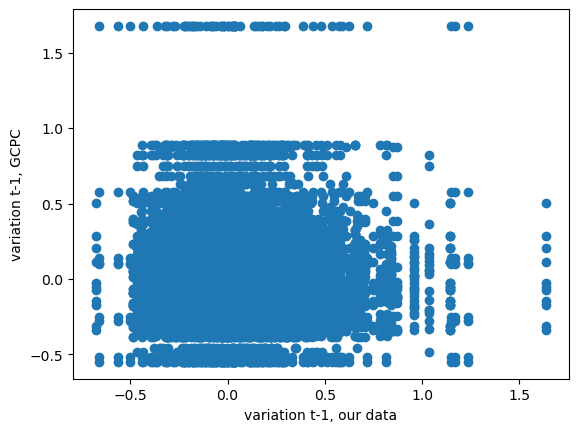

In [7]:
comparsion = our_data.merge(data, on=['country_name'])
plt.scatter(comparsion['yearly_avg_rainfall'], comparsion['GPCP'])
plt.xlabel('yearly rainfall avg our data')
plt.ylabel('yearly rainfall avg GCPC')
plt.show()

plt.scatter(comparsion['rainfall_var_t'], comparsion['GPCP_g'])
plt.xlabel('variation t, our data')
plt.ylabel('variation t, GCPC')
plt.show()

plt.scatter(comparsion['rainfall_var_t_1'], comparsion['GPCP_g_l'])
plt.xlabel('variation t-1, our data')
plt.ylabel('variation t-1, GCPC')
plt.show()

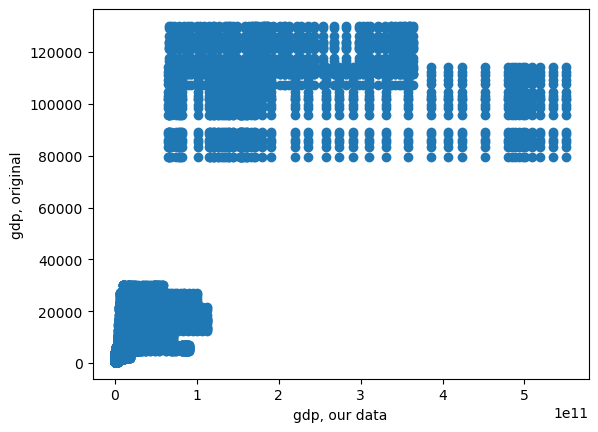

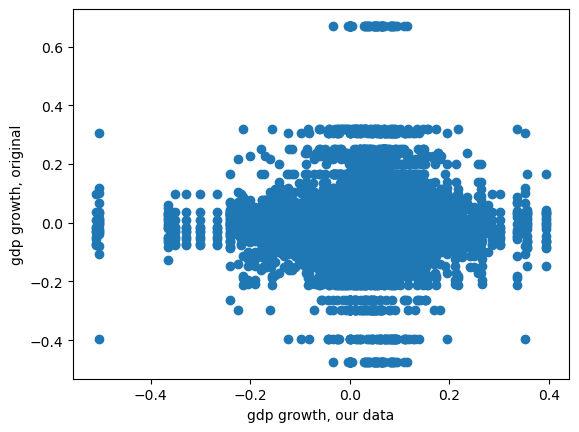

In [8]:
plt.scatter(comparsion['gdp'], comparsion['gdpen']*comparsion['pop'])
plt.xlabel('gdp, our data')
plt.ylabel('gdp, original')
plt.show()

plt.scatter(comparsion['gdp_g_ours'], comparsion['gdp_g'])
plt.xlabel('gdp growth, our data')
plt.ylabel('gdp growth, original')
plt.show()

In [9]:
feats = ['country_code', 'year', 'gdp_g', 'GPCP_g', 'GPCP_g_l']
relevant_columns = data[feats]
relevant_columns.head(60)

,country_code,year,gdp_g,GPCP_g,GPCP_g_l
0,AGO,1981,-0.037037,-0.079653,-0.107587
1,AGO,1982,0.044615,0.155680,-0.079653
2,AGO,1983,-0.008837,-0.034482,0.155680
3,AGO,1984,0.026746,0.059925,-0.034482
4,AGO,1985,0.028944,-0.018277,0.059925
5,AGO,1986,-0.002813,0.216019,-0.018277
6,AGO,1987,0.011284,-0.103502,0.216019
7,AGO,1988,0.022315,0.147912,-0.103502
8,AGO,1989,-0.043656,-0.116582,0.147912
9,AGO,1990,-0.033511,0.052566,-0.116582


In [10]:
cols = []
for code in relevant_columns['country_code'].unique():
    relevant_columns[code] = pd.get_dummies(relevant_columns['country_code'])[code]*1
    relevant_columns[f'{code}_year'] = relevant_columns[code] * relevant_columns['year']
    cols.append(code)
    cols.append(f'{code}_year')
relevant_columns.columns

/tmp/ipykernel_297566/3488485838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_columns[code] = pd.get_dummies(relevant_columns['country_code'])[code]*1
/tmp/ipykernel_297566/3488485838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_columns[f'{code}_year'] = relevant_columns[code] * relevant_columns['year']
/tmp/ipykernel_297566/3488485838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Index(['country_code', 'year', 'gdp_g', 'GPCP_g', 'GPCP_g_l', 'AGO',
       'AGO_year', 'BEN', 'BEN_year', 'BWA', 'BWA_year', 'BFA', 'BFA_year',
       'BDI', 'BDI_year', 'CMR', 'CMR_year', 'CAF', 'CAF_year', 'TCD',
       'TCD_year', 'COG', 'COG_year', 'DJI', 'DJI_year', 'ETH', 'ETH_year',
       'GAB', 'GAB_year', 'GMB', 'GMB_year', 'GHA', 'GHA_year', 'GIN',
       'GIN_year', 'GNB', 'GNB_year', 'CIV', 'CIV_year', 'KEN', 'KEN_year',
       'LSO', 'LSO_year', 'LBR', 'LBR_year', 'MDG', 'MDG_year', 'MWI',
       'MWI_year', 'MLI', 'MLI_year', 'MRT', 'MRT_year', 'MOZ', 'MOZ_year',
       'NAM', 'NAM_year', 'NER', 'NER_year', 'NGA', 'NGA_year', 'RWA',
       'RWA_year', 'SEN', 'SEN_year', 'SLE', 'SLE_year', 'SOM', 'SOM_year',
       'ZAF', 'ZAF_year', 'SDN', 'SDN_year', 'SWZ', 'SWZ_year', 'TZA',
       'TZA_year', 'TGO', 'TGO_year', 'UGA', 'UGA_year', 'ZAR', 'ZAR_year',
       'ZMB', 'ZMB_year', 'ZWE', 'ZWE_year'],
      dtype='object')

## First attempt at OLS

In [11]:
from sklearn.linear_model import LinearRegression
interaction_lr = LinearRegression()

features = ['year', 'GPCP_g', 'GPCP_g_l'] + cols 
target = 'gdp_g'
interaction_lr.fit(relevant_columns[features], relevant_columns[target])
interaction_lr.score(relevant_columns[features], relevant_columns[target])

0.13255303106453586

In [12]:
from sklearn.metrics import root_mean_squared_error

param_preds = interaction_lr.predict(relevant_columns[features])
rmse_ols = root_mean_squared_error(relevant_columns[target], param_preds)
print(rmse_ols)

0.06580158073650037


## Feature importances with `f_regression`

In [13]:
from sklearn.feature_selection import f_regression

pp = f_regression(relevant_columns[features], relevant_columns[target])[1]
print(pp)

[1.25910789e-01 7.39510639e-04 3.76145170e-01 6.61114222e-01
 6.60641855e-01 7.72490746e-01 7.70663002e-01 1.12539659e-01
 1.12633278e-01 2.96892994e-01 2.96889561e-01 7.78742111e-01
 7.75643735e-01 8.51702275e-01 8.49958828e-01 6.63078845e-01
 6.64873779e-01 5.41148971e-01 5.43383649e-01 9.46554683e-01
 9.51662160e-01 9.89146872e-01 9.91662016e-01 4.32635651e-01
 4.31695504e-01 6.68335447e-01 6.69882242e-01 6.57005257e-01
 6.59336134e-01 4.89767495e-01 4.87285454e-01 6.83154829e-01
 6.81418360e-01 3.72242830e-01 3.76044559e-01 3.31545537e-01
 3.32998026e-01 7.40485351e-01 7.39844654e-01 5.69499807e-01
 5.69096763e-01 5.12381670e-01 5.11766774e-01 1.83261103e-01
 1.84410769e-01 6.50092634e-01 6.48297103e-01 6.14386212e-01
 6.13422264e-01 6.06183197e-01 6.04962266e-01 4.19402917e-01
 4.16094622e-01 9.20288946e-01 9.19942415e-01 1.97054731e-01
 1.97891005e-01 3.05286711e-01 3.06730925e-01 7.98801816e-01
 7.98266307e-01 6.10656498e-01 6.10140117e-01 1.43987984e-02
 1.42661577e-02 9.620723

In [14]:
for i, val in enumerate(pp):
    if val < 0.05:
        print(features[i], val)

GPCP_g 0.0007395106386864671
SLE 0.014398798414350208
SLE_year 0.01426615769676157
UGA 0.011450270831883007
UGA_year 0.011593385384932861
ZAR 0.011321606583610214
ZAR_year 0.011198788378649368


Rainfall variation (`GPCP_g`) has a low p-value, meaning that it's the more important variable, consistent with the results of the original paper.

## Standard error on parameters

In [15]:
import statsmodels.api as sm

ols = sm.OLS(relevant_columns[target], relevant_columns[features])
ols_result = ols.fit()
ols_result.HC0_se

year        0.000499
GPCP_g      0.014704
GPCP_g_l    0.013175
AGO         4.326978
AGO_year    0.002181
              ...   
ZAR_year    0.002086
ZMB         4.265254
ZMB_year    0.002149
ZWE         3.905515
ZWE_year    0.001980
Length: 85, dtype: float64

In [16]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gdp_g   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.213
Date:                Wed, 16 Apr 2025   Prob (F-statistic):              0.107
Time:                        09:08:52   Log-Likelihood:                 967.51
No. Observations:                 743   AIC:                            -1767.
Df Residuals:                     659   BIC:                            -1380.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0008      0.001      1.372      0.171      -0.000       0.002
GPCP_g         0.0486      0.014      3.508      0.000       0.021       0.076
GPCP_g_l       0.0280      0.014      2.008      0.045       0.001       0.055
AGO            1.2385      5.824      0.213      0.832     -10.198      12.675
AGO_year      -0.0014      0.003     -0.476      0.634      -0.007       0.004
BEN           -4.8626      5.824     -0.835      0.404     -16.299       6.574
BEN_year       0.0017      0.003      0.580      0.562      -0.004       0.007
BWA            1.1646      5.824      0.200      0.842     -10.272      12.601
BWA_year      -0.0013      0.003     -0.458      0.647      -0.007       0.004
BFA            0.2615      5.824      0.045      0.964     -11.175      11.698
BFA_year      -0.0009      0.003     -0.303      0.762      -0.007       0.005
BDI            8.0990      5.826      1.390      0.165      -3.340      19.538
BDI_year      -0.0048      0.003     -1.660      0.097      -0.011       0.001
CMR            4.8782      5.824      0.838      0.403      -6.558      16.314
CMR_year      -0.0032      0.003     -1.104      0.270      -0.009       0.003
CAF           -5.1312      5.824     -0.881      0.379     -16.567       6.304
CAF_year       0.0018      0.003      0.625      0.532      -0.004       0.008
TCD           -5.9781      5.833     -1.025      0.306     -17.433       5.476
TCD_year       0.0022      0.003      0.769      0.442      -0.003       0.008
COG           13.3388      5.825      2.290      0.022       1.900      24.777
COG_year      -0.0075      0.003     -2.565      0.011      -0.013      -0.002
DJI          -29.3243     13.258     -2.212      0.027     -55.356      -3.292
DJI_year       0.0140      0.007      2.143      0.033       0.001       0.027
ETH           -3.5292      5.824     -0.606      0.545     -14.965       7.906
ETH_year       0.0010      0.003      0.351      0.726      -0.005       0.007
GAB           -4.5915      5.825     -0.788      0.431     -16.029       6.846
GAB_year       0.0015      0.003      0.531      0.595      -0.004       0.007
GMB           -7.0344      5.824     -1.208      0.228     -18.470       4.402
GMB_year       0.0028      0.003      0.953      0.341      -0.003       0.008
GHA           -8.0786      5.824     -1.387      0.166     -19.515       3.358
GHA_year       0.0033      0.003      1.137      0.256      -0.002       0.009
GIN           -5.2495      5.824     -0.901      0.368     -16.686       6.187
GIN_year       0.0019      0.003      0.648      0.518      -0.004       0.008
GNB           14.7340      5.824      2.530      0.012       3.297      26.171
GNB_year      -0.0082      0.003     -2.804      0.005      -0.014      -0.002
CIV           -6.1751      5.824     -1.060      0.289     -17.610       5.260
CI

In the paper, the authors have the parameter for `GPCP_g` 0.055 with a standard error of 0.016. This is 0.034 with a standard error of 0.013 for `GPCP_g_l`. We don't get the exact same numbers, but the conclusion that the parameters for these features are significantly larger than zero still holds.

## How good is OLS? Compare with Kernel Ridge (with bootstrapping)

In [17]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

nonparametric_model = KernelRidge(kernel='rbf')
param_grid = {'alpha': [10**(-k) for k in range(-5, 5)],
              "gamma": [10**(k) for k in range(-5,5)]}

search = GridSearchCV(nonparametric_model,
                      param_grid,
                      cv=5).fit(relevant_columns[features], relevant_columns[target])


In [18]:
nonparametric_model = KernelRidge(kernel='rbf', **search.best_params_)
nonparametric_model.fit(relevant_columns[features], relevant_columns[target])
nonparam_preds = nonparametric_model.predict(relevant_columns[features])
rmse = root_mean_squared_error(relevant_columns[target], nonparam_preds)
print(rmse)

0.06201020606168485


In [19]:
from sklearn.metrics import mean_squared_error

d_star = rmse_ols**2 - rmse**2

print(f'mean squared error for linear model is higher by: {d_star:.4f}')

mean squared error for linear model is higher by: 0.0005


The idea here is as follows. We fit a parametric model (OLS in this case) and we fit a non-parametric model (Kernel Ridge, in this case). Then, define $d^*=\mathrm{MSE}_\mathrm{OLS}-\mathrm{MSE}_\mathrm{KR}$. This is a measure of how much better the non-parametric model fits than the parametric one.

We have maybe a marginal difference, as $d^*=0.0005$.

We then simulate fake data from the parametric model predictions. If OLS was a good model, the data would look similar to these simulated fake data.

Fit both OLS and KR to these simulated data and obtain MSE for both models. For the $k^\mathrm{th}$ simulation, we have $d^*_k=\mathrm{MSE}(k)_\mathrm{OLS}-\mathrm{MSE}(k)_\mathrm{KR}$.

The $p$-value of the observed $d^*$ is approximately

$$
\frac{1 + \big|\{ k: d^*_k > d^* \}\big|}{1+N},
$$
where $N$ is the number of simulations.

In [20]:

nobs = relevant_columns.shape[0]
num_sims = 1000
simulated_dstars = []
variance = (nobs / (nobs - 2)) * rmse_ols**2

simulated_parametric_model = LinearRegression()

simulated_nonparametric_model = KernelRidge(kernel='rbf', **search.best_params_)

for i in range(num_sims):
    simulated_target = param_preds + np.random.normal(loc=0,scale= np.sqrt(variance), size=nobs)

    simulated_parametric_model.fit(relevant_columns[features], simulated_target)
    simulated_parametric_preds = simulated_parametric_model.predict(relevant_columns[features])
    simulated_parametric_mse = mean_squared_error(simulated_target, simulated_parametric_preds)

    simulated_nonparametric_model.fit(relevant_columns[features], simulated_target)
    simulated_nonparametric_predictions = simulated_nonparametric_model.predict(relevant_columns[features])
    simulated_nonparametric_mse = mean_squared_error(simulated_target, simulated_nonparametric_predictions)

    simulated_dstar = simulated_parametric_mse - simulated_nonparametric_mse
    simulated_dstars.append(simulated_dstar)

In [21]:
num_exceeding_dstar = (np.array(simulated_dstars) > d_star).sum()
p_value = (1 + num_exceeding_dstar) / (1 + num_sims)
print(f'p-value:{float(p_value):.4f}')

p-value:0.0090


From this I would conclude that the linear model was not the correct model specification for this data.